# Đánh giá điểm tín dụng sử dụng Decision Tree và Random Forest


Mục tiêu: 

- Xây dựng mô hình Decision Tree và Random Forest sử dụng thư viện sklearn. 
- Ứng dụng, hiểu cách áp dụng hai mô hình để giải bài toán thực tế (vd: đánh gia điểm tín dụng).
- Sử dụng độ đo thích hợp để đánh giá chất lượng mô hình. 

Vấn đề: 

- Yếu tố then chốt trong việc cho vay tín dụng là khả năng hoàn trả của người vay. Vì vậy đánh giá điểm tín dụng của người dùng là một bài toán được quan tâm trong lĩnh vực tài chính. Nhìn chung, đây là một bài toán phân lọai 2 lớp (good/bad score).
- Hơn nữa, số lượng bad credits thường ít hơn nhiều so với số lượng good credits ==> Dữ liệu nhãn lớp mất cân bằng.

Dữ liệu: 

- Thường ở dưới dạng bảng, mỗi hàng là một cá nhân vay, mỗi cột thể hiện một thuộc tính của cá nhân đó.
- Các trường thuộc tính tồn tại ở nhiều dạng: categorical, numeric (discrete / continuous). Thậm chí tên trường có thể được ẩn đi, hay giá trị thật sự được mã hõa để đảm bảo tính bảo mật của khách hàng.
- Hai tập dữ liệu sẽ sử dụng: German credit và Australian credit.

https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)

https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)

Bài toán: 

- Đầu vào: N vector D chiều, tương ứng N cá thể với D thuộc tính.
- Đầu ra: nhãn 0-1 (0: bad credit, 1: good credit).

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 

random_state = 42

## 1. Tìm hiểu dữ liệu

In [57]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Tải các files, đặt trong thư mục data/
- Làm với phiên bản 'numeric'
'''
data_path = './Data/german.data-numeric'
credit=np.genfromtxt(data_path)
print(type(credit))
print(credit)
X,y = credit[:,:-1], credit[:,-1]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


<class 'numpy.ndarray'>
[[ 1.  6.  4. ...  0.  1.  1.]
 [ 2. 48.  2. ...  0.  1.  2.]
 [ 4. 12.  4. ...  1.  0.  1.]
 ...
 [ 4. 12.  2. ...  0.  1.  1.]
 [ 1. 45.  2. ...  0.  1.  2.]
 [ 2. 45.  4. ...  0.  1.  1.]]
(1000, 24) (1000,)
(800, 24) (200, 24)


In [58]:
import pandas as pd

df = pd.DataFrame(credit)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,1.300000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,2.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.000000


## 2. Tìm hiểu mô hình Decision Tree, Random Forest của Sklearn

In [59]:
'''
- Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
DT = DecisionTreeClassifier(random_state=random_state) #gini = 1 - sum(p_i^2)

DT2 = DecisionTreeClassifier(random_state=random_state, criterion="entropy")

'''
- Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
'''
RF = RandomForestClassifier(random_state=random_state)

RF2 = DecisionTreeClassifier(random_state=random_state, criterion="entropy")

In [60]:
print('Demo DT and RF prediction')
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)
print("-DT acc = {}".format(accuracy_score(y_test, y_dt_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt_pred)))
print(confusion_matrix(y_test, y_dt_pred))

DT2.fit(X_train, y_train)
y_dt2_pred = DT2.predict(X_test)
print('\nDT with Entropy:')
print("-DT acc = {}".format(accuracy_score(y_test, y_dt2_pred)))
print("-DT f1 = {}".format(f1_score(y_test, y_dt2_pred)))
print("-DT roc auc = {}".format(roc_auc_score(y_test, y_dt2_pred)))
print(confusion_matrix(y_test, y_dt2_pred))

Demo DT and RF prediction
-DT acc = 0.665
-DT f1 = 0.7632508833922261
-DT roc auc = 0.5948431301839163
[[108  33]
 [ 34  25]]

DT with Entropy:
-DT acc = 0.715
-DT f1 = 0.797153024911032
-DT roc auc = 0.6598749849741555
[[112  29]
 [ 28  31]]


#### Decision Tree cho kết quả với Entropy tốt hơn so với Gini, vì dataset có phần Negative lớn hơn Positive (112 + 29 >> 28 + 31) (imbalance)
* Entropy nhạy hơn với các class mất cân bằng (hàm Log nhạy)

### Bài 1: Chạy RF baseline

In [61]:
#code
RF.fit(X_train, y_train)
y_rf_pred = RF.predict(X_test)

print(f'RF acc = {accuracy_score(y_test, y_rf_pred)}')
print(f'RF f1 = {f1_score(y_test, y_rf_pred)}')
print(f'RF roc auc = {roc_auc_score(y_test, y_rf_pred)}')
print(confusion_matrix(y_test, y_rf_pred))

RF2.fit(X_train, y_train)
y_rf2_pred = RF2.predict(X_test)
print('\nRF with Entropy:')
print("-RF acc = {}".format(accuracy_score(y_test, y_rf2_pred)))
print("-RF f1 = {}".format(f1_score(y_test, y_rf2_pred)))
print("-RF roc auc = {}".format(roc_auc_score(y_test, y_rf2_pred)))
print(confusion_matrix(y_test, y_rf2_pred))

RF acc = 0.81
RF f1 = 0.875
RF roc auc = 0.7173939175381656
[[133   8]
 [ 30  29]]

RF with Entropy:
-RF acc = 0.715
-RF f1 = 0.797153024911032
-RF roc auc = 0.6598749849741555
[[112  29]
 [ 28  31]]


#### Random Forest cho kết quả với Entropy tệ hơn Gini vì với imbalance data thì 1 vài sample có thể toàn Negative do đó các cây con có thể bị split quá nhiều để tìm Positive, tăng khả năng overfit -> nhận thấy FP tăng từ 8 lên 29


## 3. Tìm kiếm siêu tham số

In [62]:

# Utility functions
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    if algorithm == 'random-forest':
        model = RandomForestClassifier()
    classifier = GridSearchCV(estimator=model, cv=5, param_grid=dict_param,
                            n_jobs=n_jobs, scoring='f1')
    #cv: cross validation, split to 5 dataset, each round use 1 to validate, 4 to train
    #n_jobs: nums of parallel jobs
    #param_grid: set of parameters to test on model
    #ex: param_grid = {
              # "max_depth": [3, 5, 7],
              # "criterion": ["gini", "entropy"]
    #    }
    classifier.fit(X_train, y_train)
    print('Best model', end='')
    print(classifier.best_estimator_)
    return classifier.best_estimator_

def evaluate(model):
    #evalute on train dataset
    print("On training set")
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))  
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))  
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    #evalute on test dataset
    print("On testing set")
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))  
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), new_plot=False,
                        idx_color=0):
    # Khởi tạo bức ảnh mới với thư viện plot lib 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # chú thích nếu có 
    if ylim is not None:
        plt.ylim(*ylim)
        
    # thực hiện training model, ghi nhận các giá trị trong quá trình training 
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing 
    #  train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    # Lấy trung bình cộng các giá trị output của các fold 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label=label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label=label_curve['train'])

    plt.legend(loc="best")
    return plt

### 3.1 Decision Tree

Text(0.5, 1.0, 'DT validation curve for max_depth')

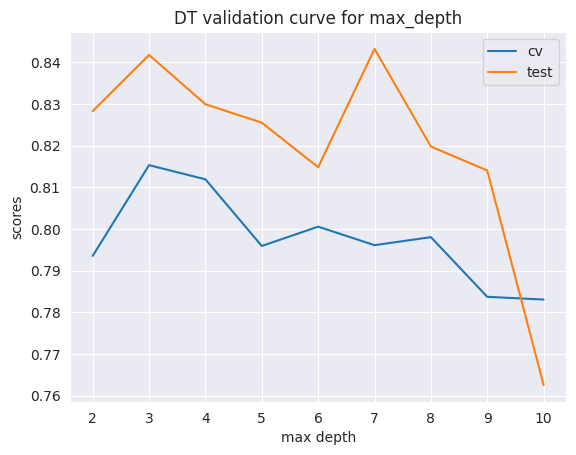

In [63]:
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

for curr_max_depth in max_depth_values:
  tree= DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)
  
  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1') #return list of F1-score for cv = 5
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(y_test, curr_pred))

# Plot 
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

#### cv_acc và test_acc đều có xu hướng giảm khi max_depth

In [64]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs=-1, dict_param=dict_param)


Best modelDecisionTreeClassifier(max_depth=5, min_samples_leaf=20)


### Bài 2: đánh giá best_tree
- Prediction performance
- Learning curve

On training set
Train Accuracy : 0.77125
Train f1 score : 0.8473728106755629
Train roc auc : 0.680523905314024
Train Confusion Matrix:
[[508  51]
 [132 109]]
--------------------------------------------------
On testing set
Test Accuracy : 0.78
Test f1 score : 0.8533333333333334
Test roc auc : 0.6911888448130785
Test Confusion Matrix:
[[128  13]
 [ 31  28]]


<module 'matplotlib.pyplot' from '/home/bonxom/ISE_Lab/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

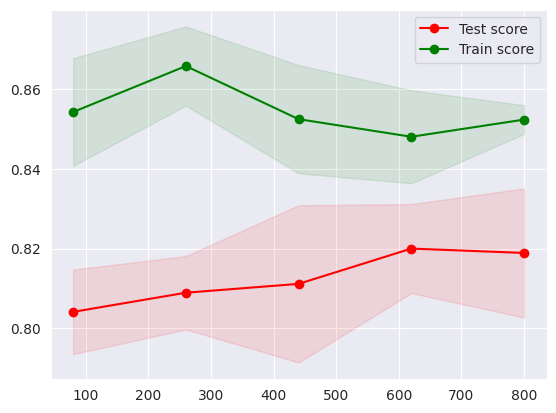

In [65]:
# code
evaluate(best_tree)
plot_learning_curve(best_tree, "Learning curve of Best Decision Tree", {'test': 'Test score', 'train': 'Train score'}, X, y)

Top 10 feature importances
Feature  0 - 0.40445005922715943
Feature  1 - 0.17066428015343657
Feature  2 - 0.14261352910286315
Feature  3 - 0.07120344185816782
Feature  4 - 0.05428847945598893
Feature  5 - 0.05400258515142507
Feature  6 - 0.04007488290946428
Feature  7 - 0.03813781829612112
Feature  8 - 0.015091674891623292
Feature  9 - 0.009473248953750433


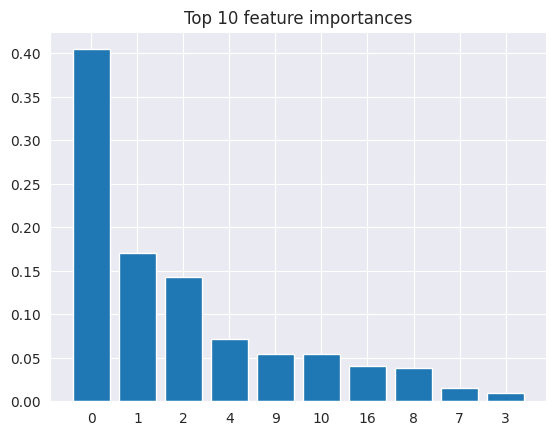

In [66]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances')
for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])

indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()

###  3.2 Random Forest

### Bài 3: thực hành tương tự với RF

[]

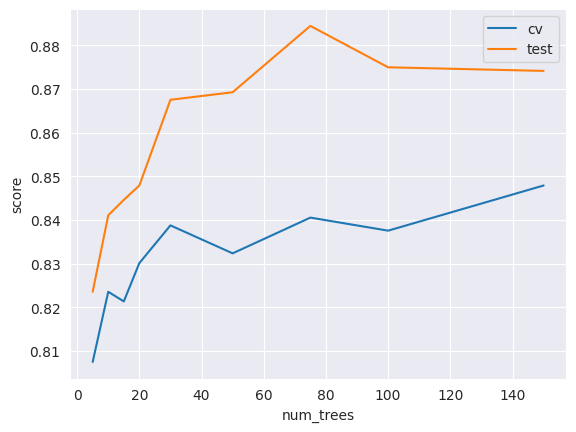

In [67]:
# Bài tập
# Tương tự, thử khảo sát RF với số lượng cây n_estimators
# code
num_trees = [5, 10, 15, 20, 30, 50, 75, 100, 150]
cv_accuracies, test_accuracies = [], []

for k in num_trees:
    model = RandomForestClassifier(n_estimators=k, random_state=random_state)

    #cross validation
    val_scores= cross_val_score(estimator=model, X=X_train, y=y_train, cv=5, scoring='f1')
    cv_accuracies.append(val_scores.mean())

    #test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracies.append(f1_score(y_test, y_pred))

plt.plot(num_trees, cv_accuracies, label = 'cv')
plt.plot(num_trees, test_accuracies, label = 'test')
plt.legend()
plt.xlabel('num_trees')
plt.ylabel('score')
plt.plot()


#### Càng tăng số lượng cây thì hiệu quả càng được cải thiện, đến khoảng 100 cây đổ lên thì score dần bão hòa

In [69]:
# Sử dụng GridSearch CV
dict_param = {
    'max_depth': [3, 11, 15, 24, 27], 
    'min_samples_leaf': [1, 5, 7, 9, 15, 24],
    'max_features':  [4, 6, 10, 16],
    'n_estimators': [75]
}
# Bài tập: 
# - tìm best_forest
# - Đánh giá best_forest
# - Vẽ learning curve
# - Tìm hiểu feature importance
# Code

# - Tìm best_forest
best_forest = grid_search('random-forest', -1, dict_param)


Best modelRandomForestClassifier(max_depth=11, max_features=10, min_samples_leaf=5,
                       n_estimators=75)


On training set
Train Accuracy : 0.89125
Train f1 score : 0.926458157227388
Train roc auc : 0.8324846532411909
Train Confusion Matrix:
[[548  11]
 [ 76 165]]
--------------------------------------------------
On testing set
Test Accuracy : 0.78
Test f1 score : 0.8580645161290322
Test roc auc : 0.666546459911047
Test Confusion Matrix:
[[133   8]
 [ 36  23]]


<module 'matplotlib.pyplot' from '/home/bonxom/ISE_Lab/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

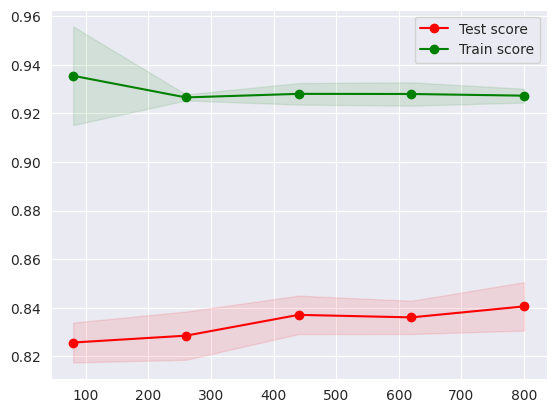

In [71]:
# Code
# - Đánh giá best_forest và vẽ Learning Curve
evaluate(best_forest)
plot_learning_curve(best_forest, "Learning Curve of Best Random Forest", {'test': 'Test score', 'train': 'Train score'}, X, y)

Feature 0 - importance: 0.1861658105538356
Feature 1 - importance: 0.13783982943155845
Feature 2 - importance: 0.11554387381598384
Feature 3 - importance: 0.11326192890420304
Feature 4 - importance: 0.08293892355097214
Feature 5 - importance: 0.0444672531678842
Feature 6 - importance: 0.04368376807452787
Feature 7 - importance: 0.04270345885859443
Feature 8 - importance: 0.03258791057582757
Feature 9 - importance: 0.0322975933484887


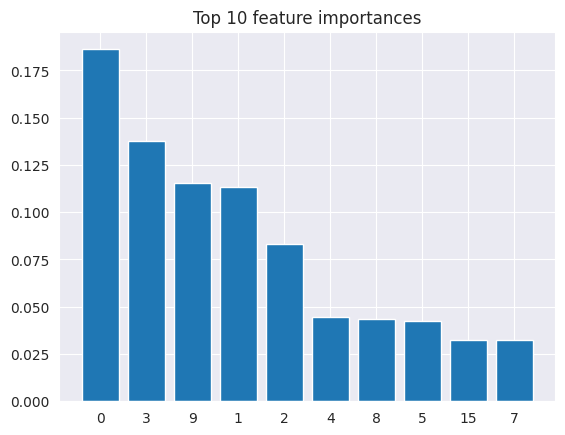

In [78]:
# Code: Feature importance
importance = best_forest.feature_importances_
sortDesIdx = np.argsort(importance)[::-1]
for i in range(10):
    print(f'Feature {i} - importance: {importance[sortDesIdx[i]]}')

sortDesIdx = sortDesIdx[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importance[sortDesIdx])
plt.xticks(range(10), sortDesIdx)
plt.show()

### 3.3 Thử nghiệm bổ sung

#### 3.3.1 Bỏ một số features có độ quan trọng thấp

acc 0.79
f1 0.8618421052631579
roc_auc 0.6933525664142326


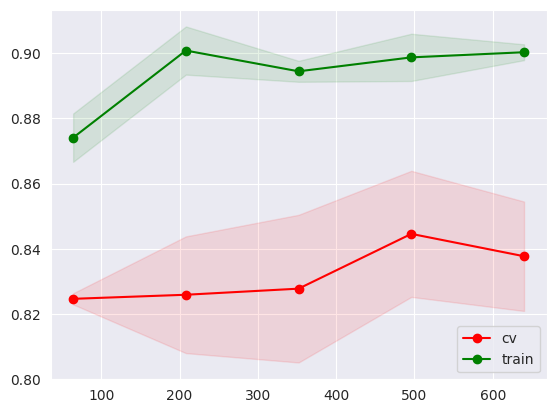

In [80]:
# Thử bỏ một sô feature có độ quan trọng thấp đi
# Chú ý tham max_features cần thay đổi
sfm = SelectFromModel(best_forest, threshold='mean') #select feature that importance >= mean
sfm.fit(X_train, y_train)
X_train_dropped = sfm.transform(X_train)
X_test_dropped = sfm.transform(X_test)

title = 'Learning with dropped features'
label_curve = {'train': 'train', 'test':'cv'}
forest_dropped = RandomForestClassifier(max_depth=11, min_samples_leaf=5,
                       n_estimators=75, n_jobs=-1, random_state=random_state)

plot_learning_curve(forest_dropped, title, label_curve, X_train_dropped, y_train, cv=5)

forest_dropped.fit(X_train_dropped, y_train)
y_dropped_pred = forest_dropped.predict(X_test_dropped)
print('acc', accuracy_score(y_test, y_dropped_pred))
print('f1', f1_score(y_test, y_dropped_pred))
print('roc_auc', roc_auc_score(y_test, y_dropped_pred))

#### Hiệu quả tăng không đáng kể

#### 3.3.2 Một số chiến lược áp dụng cho Random Forest khi gặp phải Class Imbalance
https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

In [82]:
'''
- Standard RF
'''
params = {
    'max_depth': best_forest.get_params()['max_depth'],
    'max_features': best_forest.get_params()['max_features'],
    'min_samples_leaf': best_forest.get_params()['min_samples_leaf'],
    'n_estimators': best_forest.get_params()['n_estimators'],
}
evaluate(best_forest)


On training set
Train Accuracy : 0.89125
Train f1 score : 0.926458157227388
Train roc auc : 0.8324846532411909
Train Confusion Matrix:
[[548  11]
 [ 76 165]]
--------------------------------------------------
On testing set
Test Accuracy : 0.78
Test f1 score : 0.8580645161290322
Test roc auc : 0.666546459911047
Test Confusion Matrix:
[[133   8]
 [ 36  23]]


In [83]:
'''
- Random Forest With Class Weighting #khi tính Entropy thì đánh trọng số cho từng class, class thiểu số được đánh trọng số cao hơn
'''
rf1 = RandomForestClassifier(max_depth=params['max_depth'], max_features=params['max_features'],
                             min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
                             class_weight='balanced')
rf1.fit(X_train, y_train)
evaluate(rf1)

On training set
Train Accuracy : 0.90375
Train f1 score : 0.9301903898458749
Train roc auc : 0.8945397456928867
Train Confusion Matrix:
[[513  46]
 [ 31 210]]
--------------------------------------------------
On testing set
Test Accuracy : 0.78
Test f1 score : 0.8450704225352113
Test roc auc : 0.7306166606563289
Test Confusion Matrix:
[[120  21]
 [ 23  36]]


In [87]:
'''
- Random Forest With Bootstrap Class Weighting # như Class Weighting nhưng lấy mẫu lớp thiểu số được chọn với xác suất cao hơn
'''
rf2 = RandomForestClassifier(max_depth=params['max_depth'], max_features=params['max_features'],
                             min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
                             class_weight='balanced_subsample')
rf2.fit(X_train, y_train)
evaluate(rf2)

On training set
Train Accuracy : 0.90125
Train f1 score : 0.9277218664226898
Train roc auc : 0.8974717745826498
Train Confusion Matrix:
[[507  52]
 [ 27 214]]
--------------------------------------------------
On testing set
Test Accuracy : 0.79
Test f1 score : 0.85
Test roc auc : 0.7524942901791081
Test Confusion Matrix:
[[119  22]
 [ 20  39]]


In [86]:
'''
- Random Forest With Random Undersampling #giảm số mẫu của lớp đa số về gần bằng lớp tối thiểu-> mỗi cây con train trên 1 tập sub-data balance
'''
from imblearn.ensemble import BalancedRandomForestClassifier
rf3 = BalancedRandomForestClassifier(max_depth=params['max_depth'], max_features=params['max_features'],
                             min_samples_leaf = params['min_samples_leaf'], n_estimators=params['n_estimators'],
                             )
rf3.fit(X_train, y_train)
evaluate(rf3)

On training set
Train Accuracy : 0.8525
Train f1 score : 0.888045540796964
Train roc auc : 0.8625880536524172
Train Confusion Matrix:
[[468  91]
 [ 27 214]]
--------------------------------------------------
On testing set
Test Accuracy : 0.76
Test f1 score : 0.8208955223880597
Test roc auc : 0.7460031253756462
Test Confusion Matrix:
[[110  31]
 [ 17  42]]
